In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
# import import_ipynb
# import utils
# from importlib import reload
# reload(utils)

ModuleSpec(name='utils', loader=<import_ipynb.NotebookLoader object at 0x00000156E5270E30>, origin='utils.ipynb')

In [ ]:
years = ['1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']

## Importation des features et pré-traitement

In [ ]:
pop = {}
gdp = {}
for year in years:
    # Lire le fichier CSV et définir 'country' comme index
    df_pop = pd.read_csv(f'./data_cleaned/population/{year}_population.csv')
    df_gdp = pd.read_csv(f'./data_cleaned/gdp_capita/{year}_gdp_capita.csv')
    df_pop.set_index('country', inplace=True)
    df_gdp.set_index('country', inplace=True)
    if year == '2020':
        pop[year] = df_pop['2021(JO-2020)']
        gdp[year] = df_gdp['2021(JO-2020)']
    else:
        pop[year] = df_pop[year]
        gdp[year] = df_gdp[year]

country
Albania       0.025418
Algeria       0.064224
Andorra       0.348711
Angola        0.030393
Argentina     0.137042
                ...   
Uzbekistan    0.029398
Venezuela     0.157847
Vietnam       0.016282
Zambia        0.013388
Zimbabwe      0.017730
Name: 1992, Length: 163, dtype: float64

## Importation des résultats JO et pré-traitement

In [ ]:
medals = pd.read_csv('second_part_countries_cleaned.csv')

# Réinitialiser l'index
medals = medals.reset_index(drop=True)

# Créer un dictionnaire pour stocker les résultats par année
results_by_year = {}

# Parcourir chaque ligne du DataFrame et ajouter les résultats au dictionnaire
for index, row in medals.iterrows():
    year = str(int(row['year']))
    results_by_year[year] = row.drop('year')

# Ecraser la variable medals
medals = results_by_year.copy()


1.0


## Population

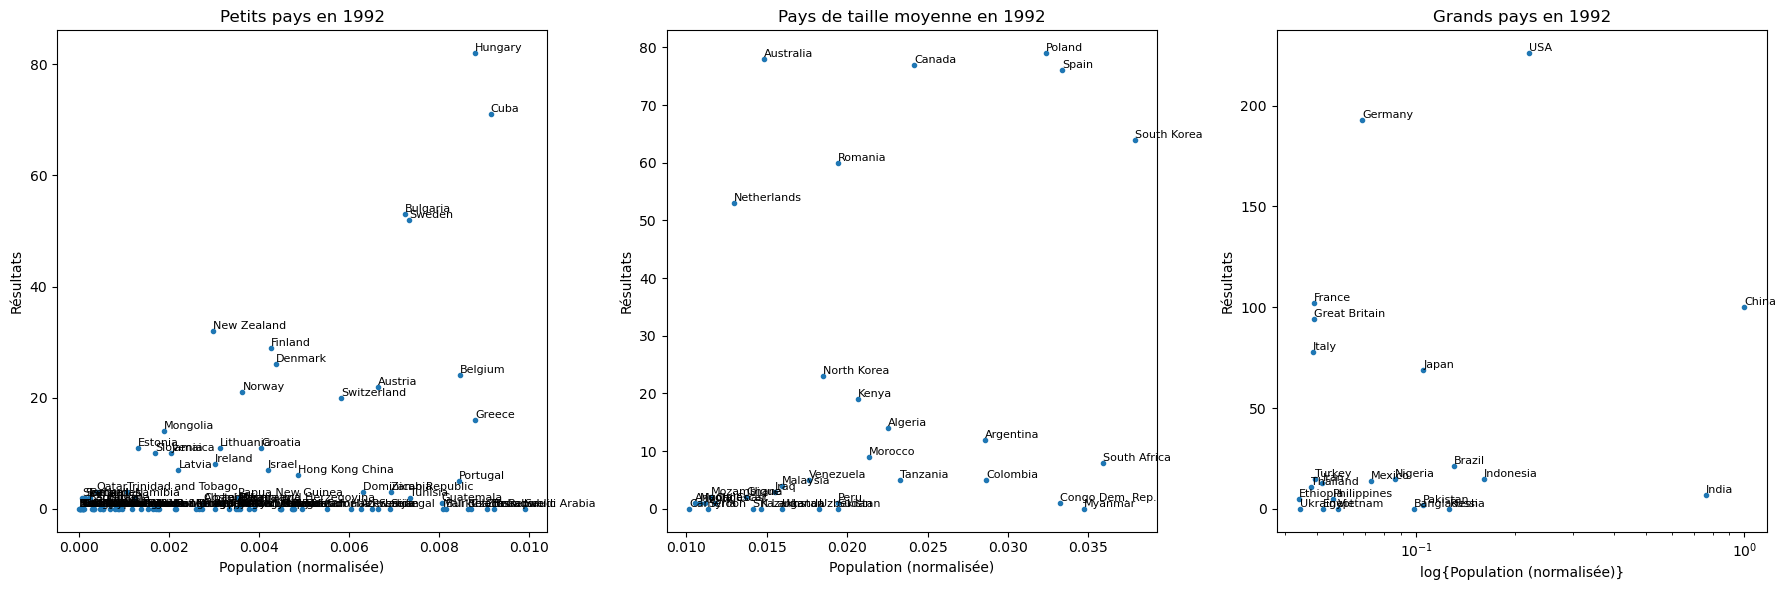

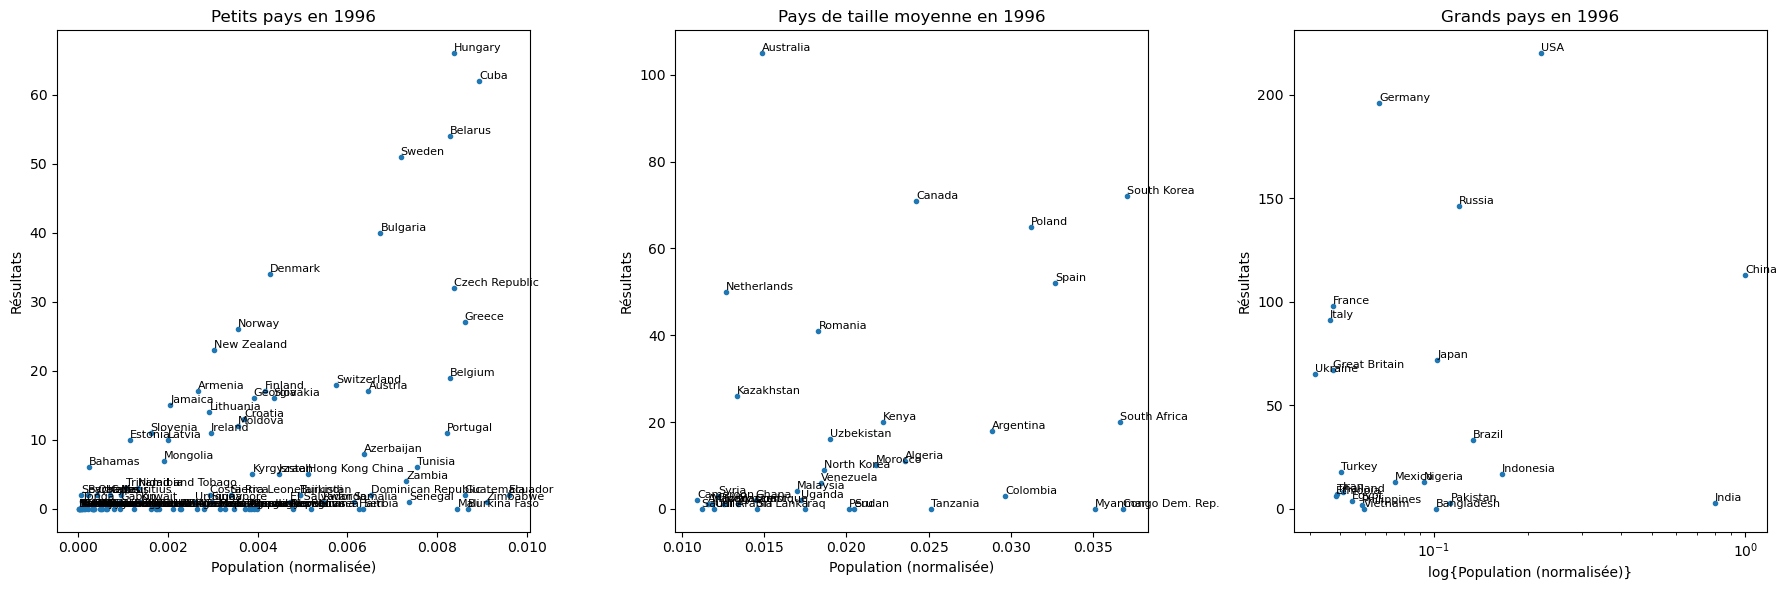

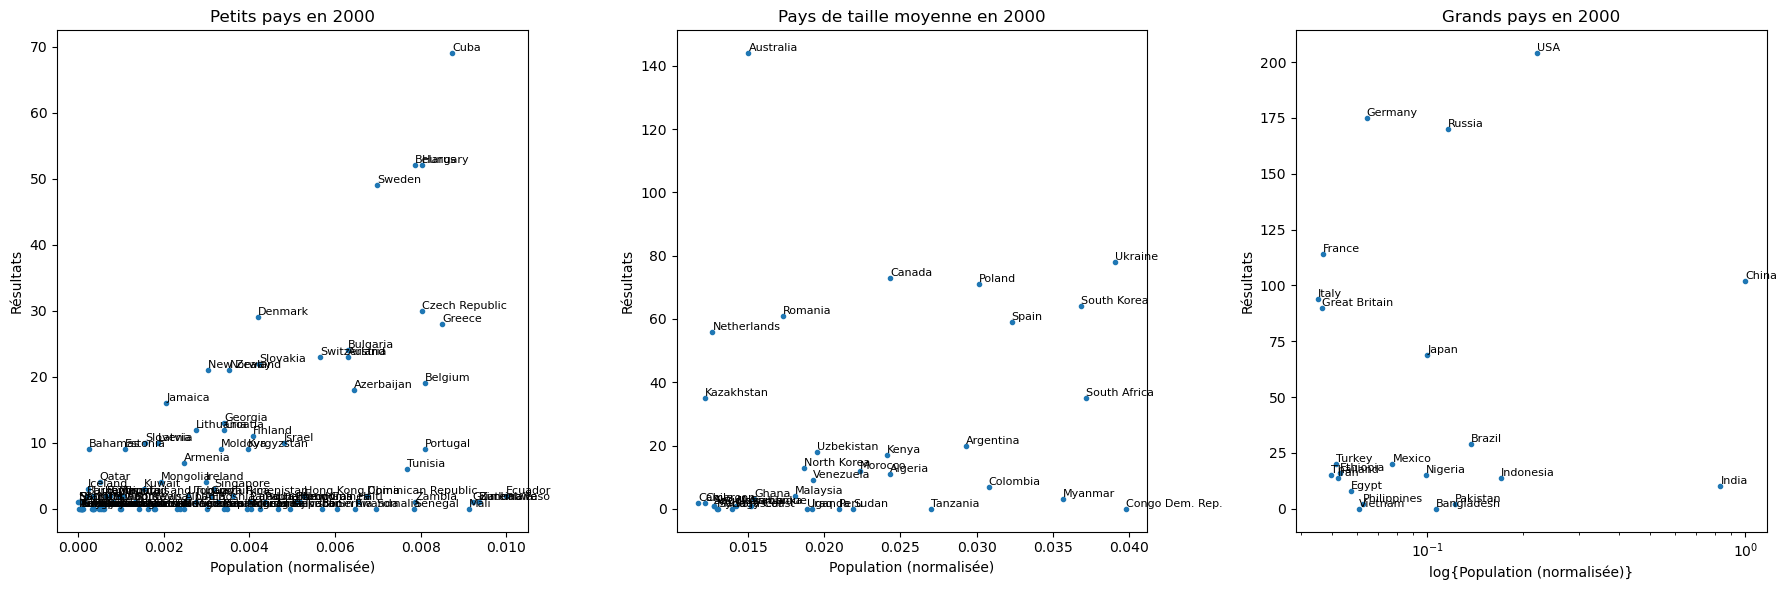

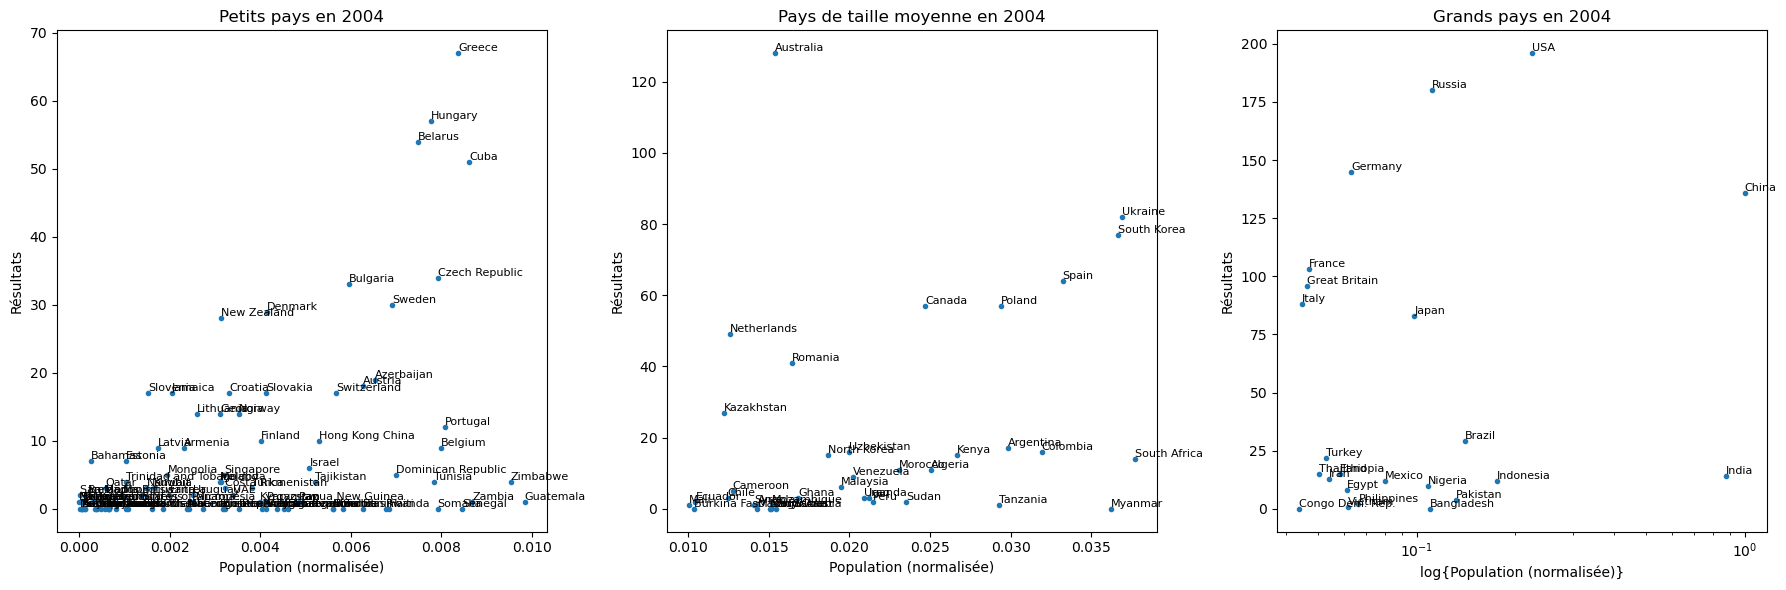

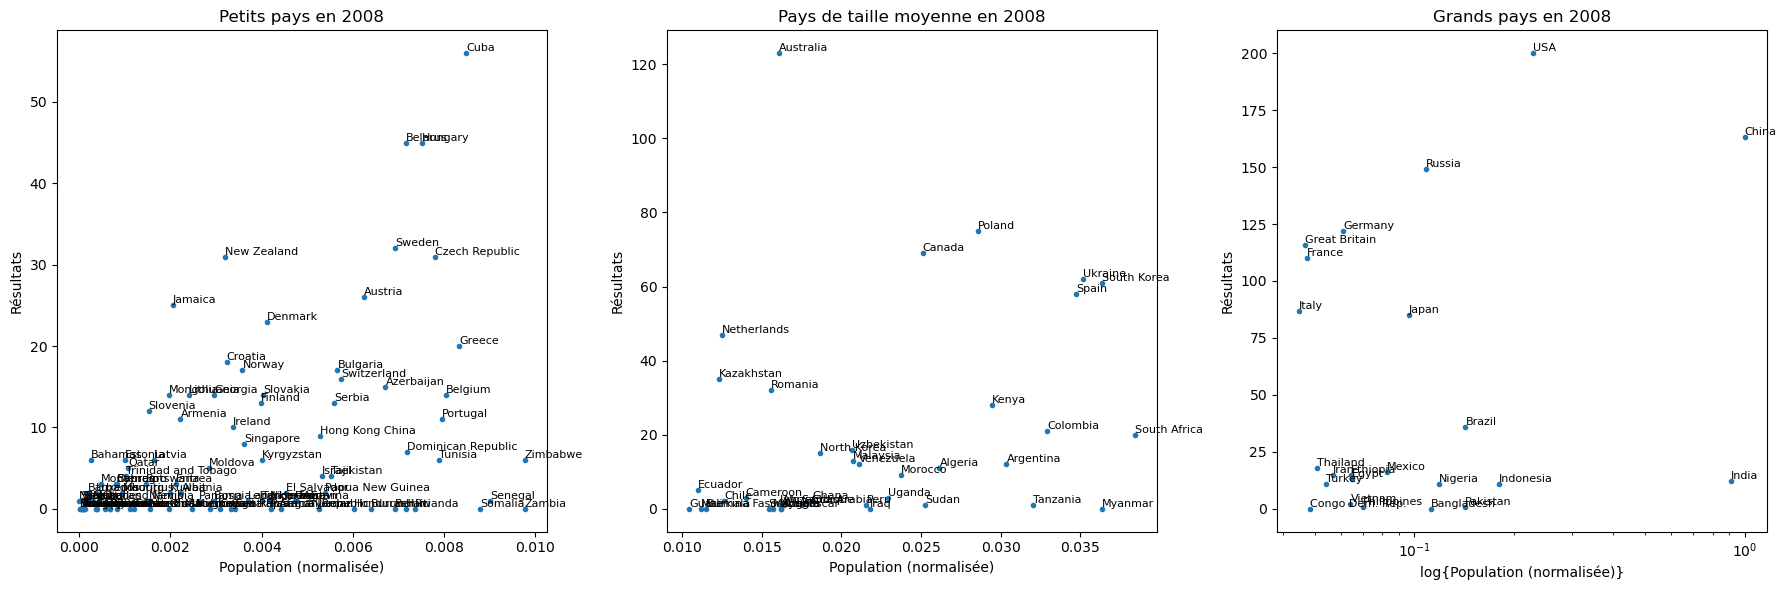

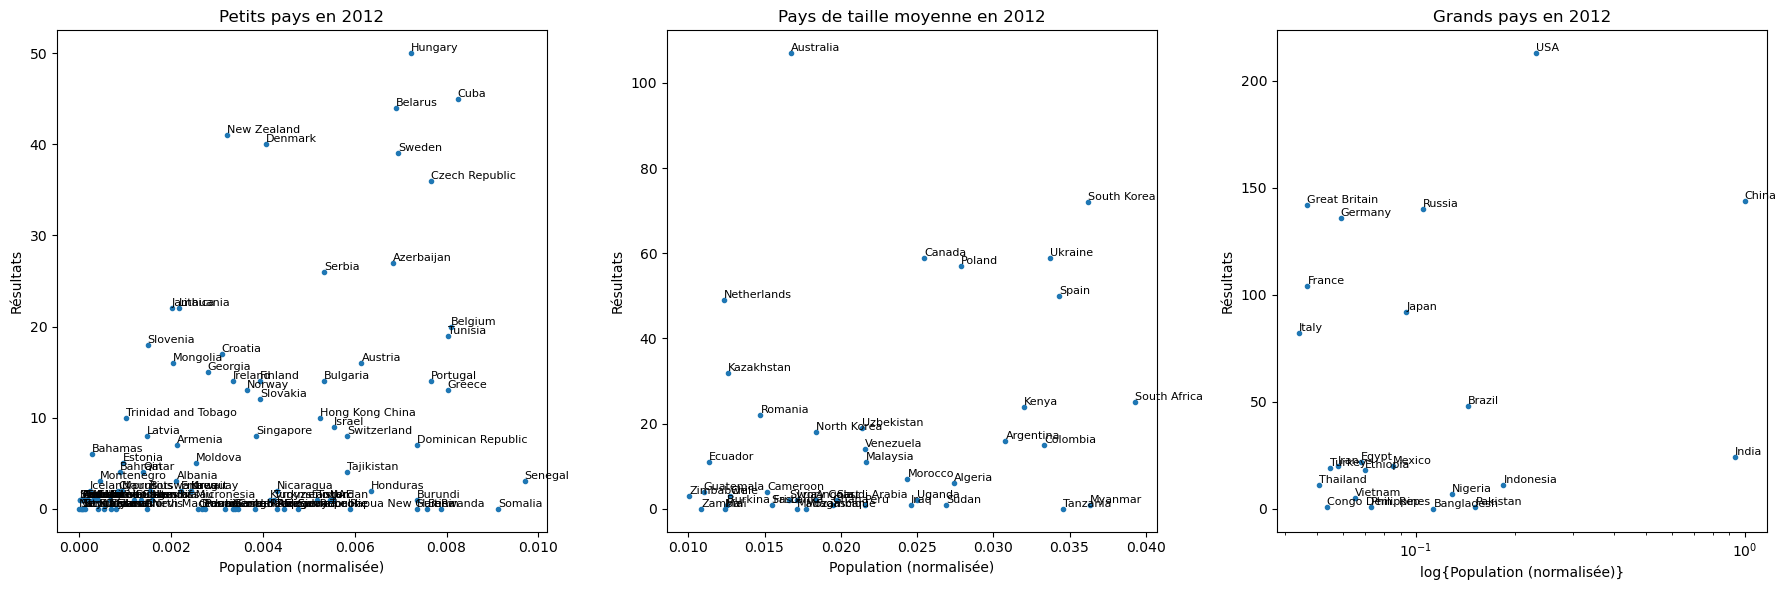

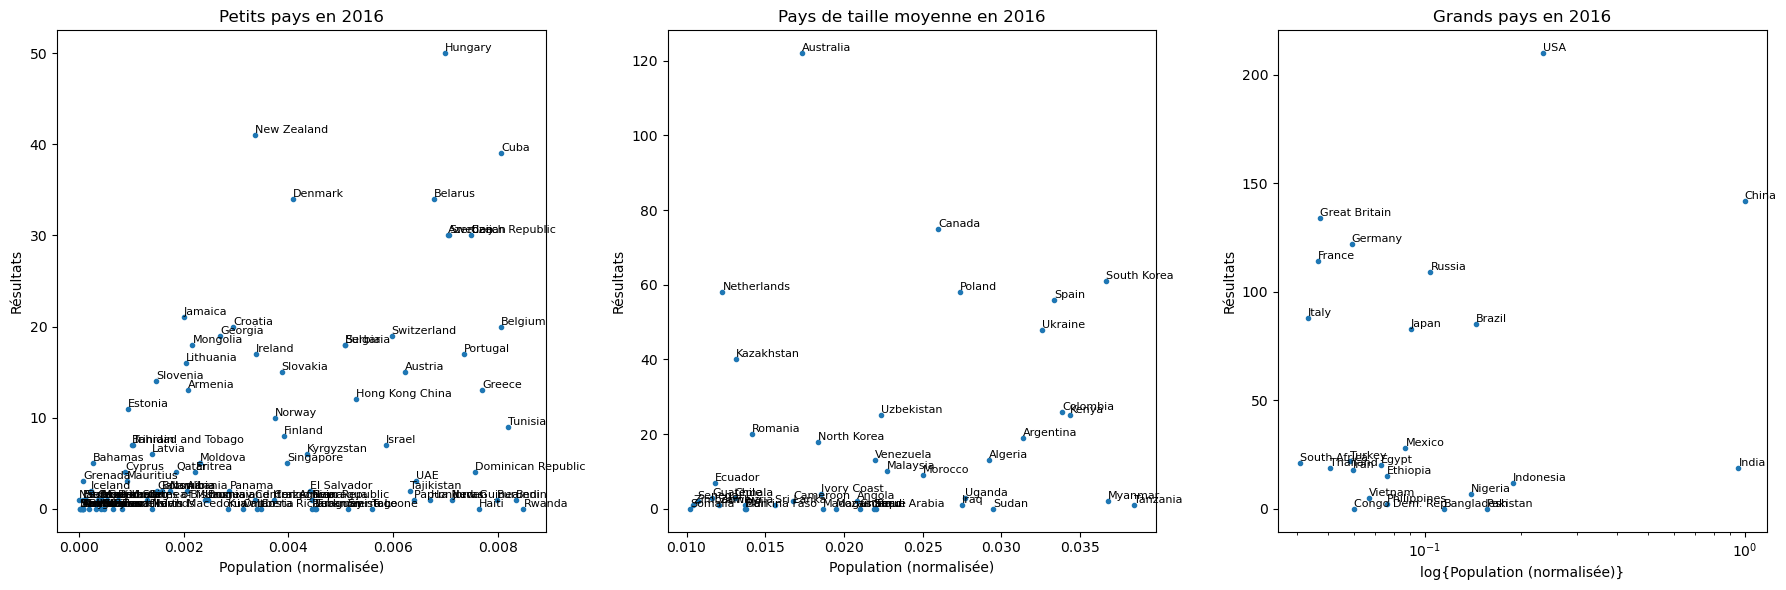

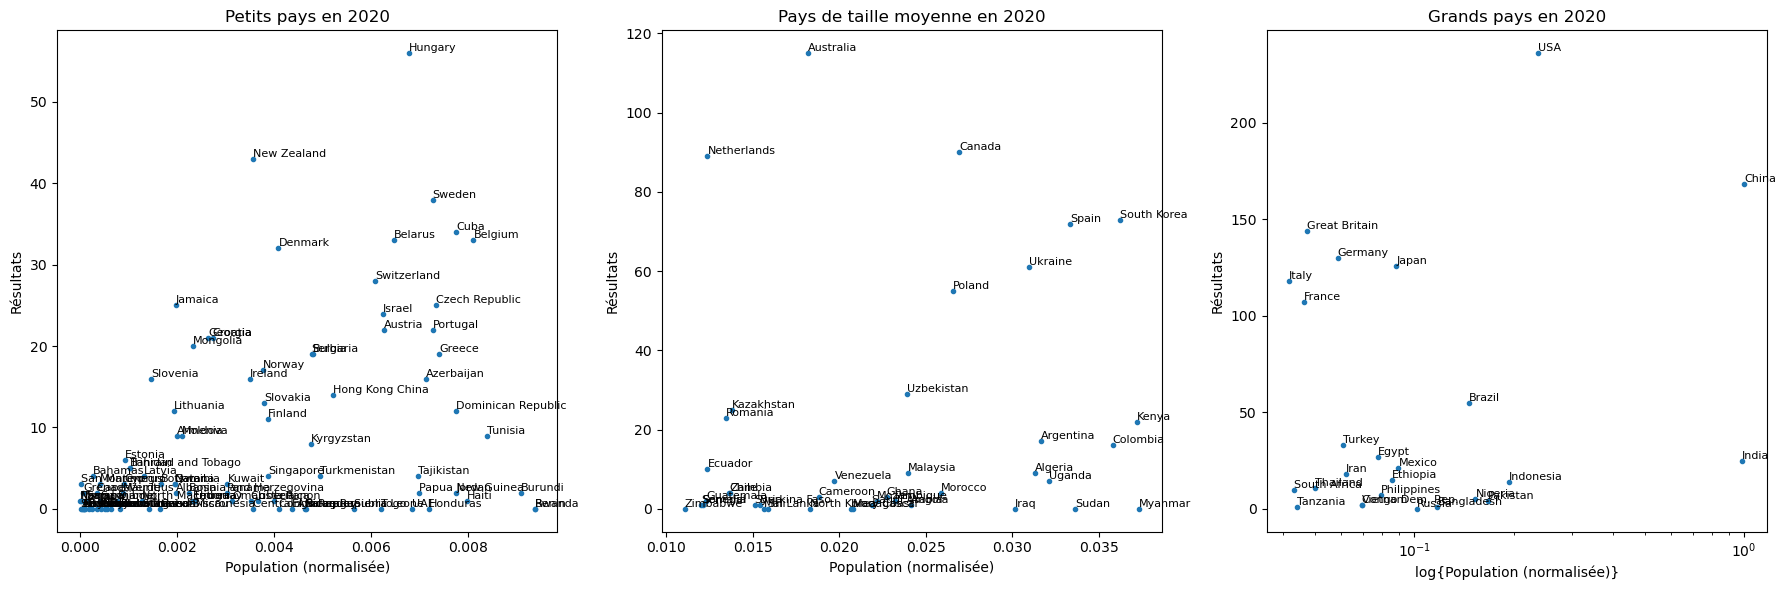

In [95]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []
    
    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])
    
    # Créer un DataFrame fusionné
    merged = pd.DataFrame({'country': countries, 'population': populations, 'medals': medals_counts})
    
    # Créer une figure pour chaque année
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes
    
    # Filtrer les données pour la population comprise entre [0, threshold1] pour le premier graphique
    merged1 = merged[merged['population'] <= threshold1]
    
    # Tracer le premier graphique (population entre 0 et threshold1)
    axes[0].plot(merged1['population'], merged1['medals'], '.', label='Points')
    for i, country in enumerate(merged1['country']):
        axes[0].text(merged1['population'].iloc[i], merged1['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[0].set_xlabel("Population (normalisée)")
    axes[0].set_ylabel("Résultats")
    axes[0].set_title(f"Petits pays en {year}")
    
    # Filtrer les données pour la population comprise entre ]threshold1, threshold2] pour le second graphique
    merged2 = merged[(merged['population'] > threshold1) & (merged['population'] <= threshold2)]
    
    # Tracer le deuxième graphique (population entre threshold1 et threshold2)
    axes[1].plot(merged2['population'], merged2['medals'], '.', label='Points')
    for i, country in enumerate(merged2['country']):
        axes[1].text(merged2['population'].iloc[i], merged2['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[1].set_xlabel("Population (normalisée)")
    axes[1].set_ylabel("Résultats")
    axes[1].set_title(f"Pays de taille moyenne en {year}")
    
    # Filtrer les données pour la population comprise entre ]threshold2, 1] pour le troisième graphique
    merged3 = merged[merged['population'] > threshold2]
    
    # Tracer le troisième graphique (population entre threshold2 et 1)
    axes[2].plot(merged3['population'], merged3['medals'], '.', label='Points')
    for i, country in enumerate(merged3['country']):
        axes[2].text(merged3['population'].iloc[i], merged3['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    axes[2].set_xscale('log')
    axes[2].set_xlabel("log{Population (normalisée)}")
    axes[2].set_ylabel("Résultats")
    axes[2].set_title(f"Grands pays en {year}")
    
    # Ajuster l'espace entre les graphiques
    plt.tight_layout()
    
    # Afficher les graphiques
    plt.show()


In [97]:
# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Créer une visualisation interactive avec Plotly
fig = px.scatter(df, x='population', y='medals', animation_frame='year', animation_group='country',
                 size='medals', color='country', hover_name='country',
                 log_x=True, size_max=60, range_x=[0.00001, 1], range_y=[0, df['medals'].max()])

fig.update_layout(title='Résultats aux JO selon la population au fil des années',
                  xaxis_title='log{Population normalisée}',
                  yaxis_title='Nombre de médailles')

fig.show()


In [63]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries = []
    populations = []
    medals_counts = []

    # Parcourir chaque pays dans le dictionnaire de médailles pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            medals_counts.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'medals': medals_counts,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Normaliser les médailles entre 0 et 1
df['medals_normalized'] = df['medals'] / df['medals'].max()

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1]
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)]
df3 = df[df['population'] > threshold2]

# Définir une fonction pour colorer les pays en gris s'ils ont 0 médailles
def color_medals(row, threshold=0):
    return 'gray' if row['medals'] <= threshold else row['country']

# Appliquer la fonction de coloration
df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[0.00001, threshold1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[threshold1+0.00001, threshold2], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='medals_normalized', animation_frame='year', animation_group='country',
                  size='medals', color='color', hover_name='country',
                  log_x=True, size_max=60, range_x=[threshold2+0.00001, 1], range_y=[-0.05, 1.05],
                  color_discrete_map={'gray': 'gray'})

# Afficher les graphiques interactifs
fig1.show()
fig2.show()
fig3.show()


C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Julien\AppData\Local\Temp\ipykernel_7464\3434987129.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [146]:
'''
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    # Créer des listes pour stocker les données de population et de médailles
    countries   = []
    populations = []
    results     = []

    # Parcourir chaque pays dans le dictionnaire de résultats pour l'année en cours
    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            results.append(medals[year][country])

    # Ajouter les données de l'année en cours à la liste
    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'results': results,
        'year': [year] * len(countries)
    })
    data.append(year_data)

# Combiner les données de toutes les années en un seul DataFrame
df = pd.concat(data)

# Filtrer les données pour chaque plage de population
df1 = df[df['population'] <= threshold1].copy()
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)].copy()
df3 = df[df['population'] > threshold2].copy()

# Vérifier la répartition des pays dans chaque DataFrame
print("\nPays dans df3 (Grands pays):")
print(df3['country'].unique())
print("\nPays dans df2 (Pays moyens):")
print(df2['country'].unique())
print("Pays dans df1 (Petits pays):")
print(df1['country'].unique())

# Normaliser les médailles entre 0 et 1 pour chaque sous-graphique
df1.loc[:, 'results_normalized'] = df1['results'] / df1['results'].max()
df2.loc[:, 'results_normalized'] = df2['results'] / df2['results'].max()
df3.loc[:, 'results_normalized'] = df3['results'] / df3['results'].max()

# Définir une fonction pour colorer les pays en gris s'ils ont moins ou égal à un seuil de résultats
def color_medals(row, threshold=0):
    if row['country'] == 'Russia':
        return row['country']
    return row['country'] if row['results'] > threshold else "_Results = 0"

# Appliquer la fonction de coloration
df1.loc[:, 'color'] = df1.apply(color_medals, axis=1)
df2.loc[:, 'color'] = df2.apply(color_medals, axis=1)
df3.loc[:, 'color'] = df3.apply(color_medals, axis=1)

# Créer des graphiques interactifs indépendants avec Plotly

# Graphique pour la population comprise entre [0, threshold1]
fig1 = px.scatter(df1, x='population', y='results_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df1), color='color', hover_name='country',
                  log_x=True, range_x=[1e-5 * 0.9, threshold1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'_Results = 0':'gray'}, title=f"Petits pays")
fig1.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold1, threshold2]
fig2 = px.scatter(df2, x='population', y='results_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df2), color='color', hover_name='country',
                  log_x=True, range_x=[threshold1 * 0.9, threshold2 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'_Results = 0':'gray'}, title=f"Pays de taille moyenne")
fig2.update_layout(xaxis_title="Population (normalisée)", yaxis_title="Résultats (normalisés)")

# Graphique pour la population comprise entre ]threshold2, 1]
fig3 = px.scatter(df3, x='population', y='results_normalized', animation_frame='year', animation_group='country',
                  size=[50]*len(df3), color='color', hover_name='country',
                  log_x=True, range_x=[threshold2 * 0.9, 1 * 1.1], range_y=[-0.05, 1.05],
                  color_discrete_map={'_Results = 0':'gray'}, title=f"Grands pays")
fig3.update_layout(xaxis_title="log{Population (normalisée)}", yaxis_title="Résultats (normalisés)")

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("./data_visualization/petits_pays_population.html")
fig2.write_html("./data_visualization/pays_moyens_population.html")
fig3.write_html("./data_visualization/grands_pays_population.html")

print("Les graphiques interactifs ont été exportés en fichiers HTML.")
'''


'\n# Seuils de population\nthreshold1 = 0.01\nthreshold2 = 0.04\n\n# Créer une liste pour stocker les données de toutes les années\ndata = []\n\nfor year in years:\n    # Créer des listes pour stocker les données de population et de médailles\n    countries   = []\n    populations = []\n    results     = []\n\n    # Parcourir chaque pays dans le dictionnaire de résultats pour l\'année en cours\n    for country in medals[year].index:\n        if country in pop[year].index:\n            countries.append(country)\n            populations.append(pop[year][country])\n            results.append(medals[year][country])\n\n    # Ajouter les données de l\'année en cours à la liste\n    year_data = pd.DataFrame({\n        \'country\': countries,\n        \'population\': populations,\n        \'results\': results,\n        \'year\': [year] * len(countries)\n    })\n    data.append(year_data)\n\n# Combiner les données de toutes les années en un seul DataFrame\ndf = pd.concat(data)\n\n# Filtrer les 

In [162]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    countries = []
    populations = []
    results = []

    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            results.append(medals[year][country])

    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'results': results,
        'year': [year] * len(countries)
    })
    data.append(year_data)

df = pd.concat(data)

df1 = df[df['population'] <= threshold1].copy()
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)].copy()
df3 = df[df['population'] > threshold2].copy()

df1['results_normalized'] = df1['results'] / df1['results'].max()
df2['results_normalized'] = df2['results'] / df2['results'].max()
df3['results_normalized'] = df3['results'] / df3['results'].max()

palette = px.colors.qualitative.Plotly
unique_countries = df['country'].unique()
color_map = {country: palette[i % len(palette)] for i, country in enumerate(unique_countries)}
color_map['_Results = 0'] = 'gray'

def color_medals(row, threshold=0):
    if row['country'] == 'Russia':
        return row['country']
    return row['country'] if row['results'] > threshold else "_Results = 0"

df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

def create_figure(df, title):
    fig = go.Figure()

    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        fig.add_trace(go.Scatter(
            x=country_data['population'],
            y=country_data['results_normalized'],
            mode='markers',
            marker={'size': 10, 'color': color_map.get(country, 'gray')},
            name=country,
            text=country_data['year']
        ))

    fig.update_layout(
        xaxis_title="Population (normalisée)",
        yaxis_title="Résultats (normalisés)",
        title=title,
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }]
    )

    return fig

# Créer les graphiques pour chaque groupe de population
fig1 = create_figure(df1, "Petits pays")
fig2 = create_figure(df2, "Pays de taille moyenne")
fig3 = create_figure(df3, "Grands pays")

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("./data_visualization/population/petits_pays_statique.html")
fig2.write_html("./data_visualization/population/pays_moyens_statique.html")
fig3.write_html("./data_visualization/population/grands_pays_statique.html")

print("Les graphiques des traces ont été exportés en fichiers HTML.")

Les graphiques des traces ont été exportés en fichiers HTML.


In [161]:
# Seuils de population
threshold1 = 0.01
threshold2 = 0.04

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    countries = []
    populations = []
    results = []

    for country in medals[year].index:
        if country in pop[year].index:
            countries.append(country)
            populations.append(pop[year][country])
            results.append(medals[year][country])

    year_data = pd.DataFrame({
        'country': countries,
        'population': populations,
        'results': results,
        'year': [year] * len(countries)
    })
    data.append(year_data)

df = pd.concat(data)

df1 = df[df['population'] <= threshold1].copy()
df2 = df[(df['population'] > threshold1) & (df['population'] <= threshold2)].copy()
df3 = df[df['population'] > threshold2].copy()

df1['results_normalized'] = df1['results'] / df1['results'].max()
df2['results_normalized'] = df2['results'] / df2['results'].max()
df3['results_normalized'] = df3['results'] / df3['results'].max()

palette = px.colors.qualitative.Plotly
unique_countries = df['country'].unique()
color_map = {country: palette[i % len(palette)] for i, country in enumerate(unique_countries)}
color_map['_Results = 0'] = 'gray'

def color_medals(row, threshold=0):
    if row['country'] == 'Russia':
        return row['country']
    return row['country'] if row['results'] > threshold else "_Results = 0"

df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

def create_figure(df, title):
    fig = go.Figure()

    # Ajouter les traces pour les pays avec résultats
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        color = color_map.get(country, 'gray')  # Couleur en fonction du dictionnaire

        # Ajouter la trace normale si le pays a des résultats
        if country != '_Results = 0':
            fig.add_trace(go.Scatter(
                x=country_data[country_data['year'] == years[0]]['population'],
                y=country_data[country_data['year'] == years[0]]['results_normalized'],
                mode='markers',
                marker={'size': 10, 'color': color},
                name=country,
                text=country_data['year']
            ))

    # Ajouter une trace pour '_Results = 0'
    zero_result_data = df[df['color'] == '_Results = 0']
    if not zero_result_data.empty:
        fig.add_trace(go.Scatter(
            x=zero_result_data[zero_result_data['year'] == years[0]]['population'],
            y=zero_result_data[zero_result_data['year'] == years[0]]['results_normalized'],
            mode='markers',
            marker={'size': 10, 'color': 'gray'},
            name='_Results = 0',
            text=zero_result_data['year']
        ))

    # Créer les frames pour chaque année
    frames = []
    for year in years:
        frame_data = []

        # Ajout de la frame pour chaque pays
        for country in df['country'].unique():
            country_data = df[df['country'] == country]
            color = color_map.get(country, 'gray')

            if country != '_Results = 0':
                frame_data.append(go.Scatter(
                    x=country_data[country_data['year'] == year]['population'],
                    y=country_data[country_data['year'] == year]['results_normalized'],
                    mode='markers',
                    marker={'size': 10, 'color': color},
                    name=country,
                    text=country_data['year']
                ))

        # Ajout de la frame pour '_Results = 0'
        zero_result_data_year = zero_result_data[zero_result_data['year'] == year]
        if not zero_result_data_year.empty:
            frame_data.append(go.Scatter(
                x=zero_result_data_year['population'],
                y=zero_result_data_year['results_normalized'],
                mode='markers',
                marker={'size': 10, 'color': 'gray'},
                name='_Results = 0',
                text=zero_result_data_year['year']
            ))

        frames.append(go.Frame(data=frame_data, name=str(year)))

    fig.update(frames=frames)
    
    # Layout et légende
    fig.update_layout(
        xaxis_title="Population (normalisée)",
        yaxis_title="Résultats (normalisés)",
        title=title,
        xaxis={'range': [-0.05, 1.05]},  
        yaxis={'range': [-0.05, 1.05]},
        annotations=[{
            "text": "",  
            "xref": "paper", "yref": "paper",
            "x": 0.5, "y": 1.15, "showarrow": False,
            "font": {"size": 20}
        }],
        updatemenus=[{
            "type": "buttons",
            "direction": "left",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "buttons": [
                {
                    "label": "Play",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}]
                },
                {
                    "label": "Pause",
                    "method": "animate",
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}]
                }
            ]
        }]
    )

    fig.update_layout(
        sliders=[{
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 20},
                "prefix": "Année: ",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {"args": [[str(year)], {"frame": {"duration": 300, "redraw": True}, "mode": "immediate"}],
                 "label": str(year),
                 "method": "animate"} for year in years
            ]
        }]
    )

    return fig


# Créer les graphiques pour chaque groupe de population avec des échelles d'axes spécifiques
fig1 = create_figure(df1, "Petits pays")
fig1.update_layout(xaxis_range=[0, threshold1])

fig2 = create_figure(df2, "Pays de taille moyenne")
fig2.update_layout(xaxis_range=[threshold1, threshold2])

fig3 = create_figure(df3, "Grands pays")
min_population_log = np.log10(df3['population'].min()) - 0.05
max_population_log = np.log10(df3['population'].max()) + 0.05
fig3.update_layout(xaxis_type='log', xaxis_range=[min_population_log, max_population_log], xaxis_autorange=False)  # Désactive l'autorange

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("./data_visualization/population/petits_pays_dynamique.html")
fig2.write_html("./data_visualization/population/pays_moyens_dynamique.html")
fig3.write_html("./data_visualization/population/grands_pays_dynamique.html")

print("Les graphiques interactifs ont été exportés en fichiers HTML.")

Les graphiques interactifs ont été exportés en fichiers HTML.


## GDP

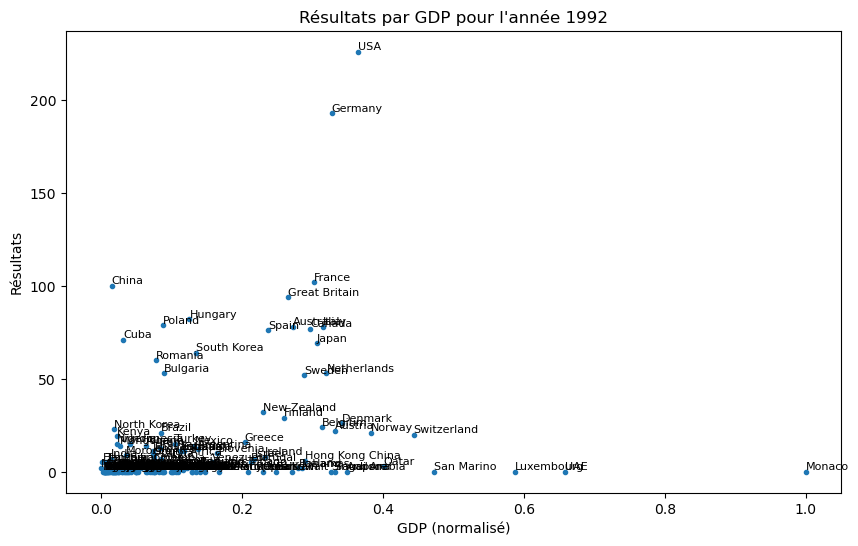

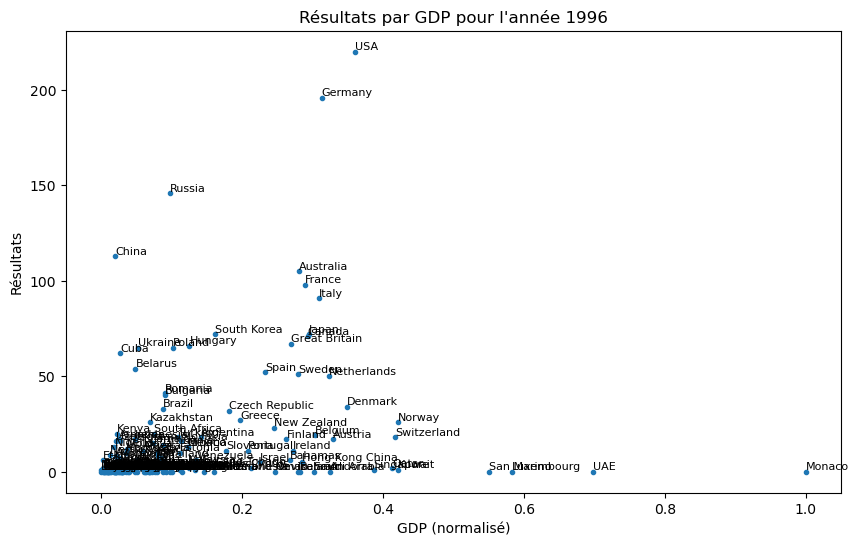

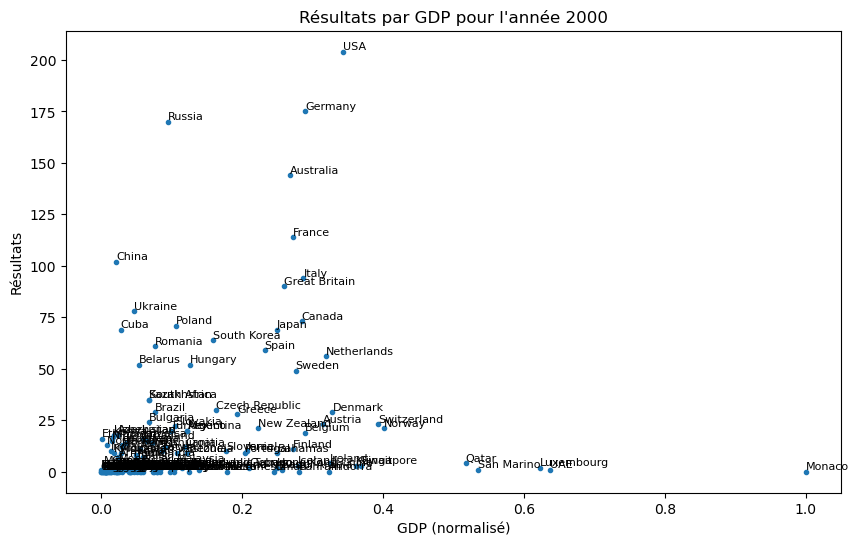

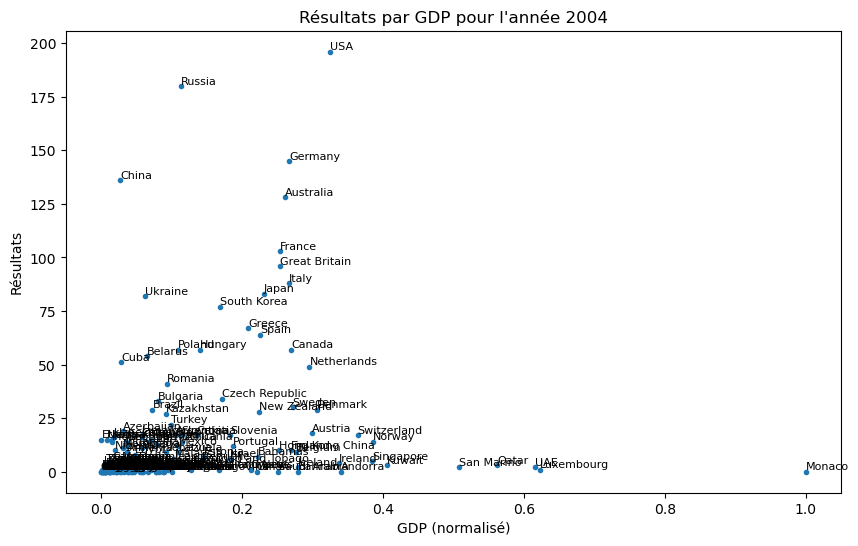

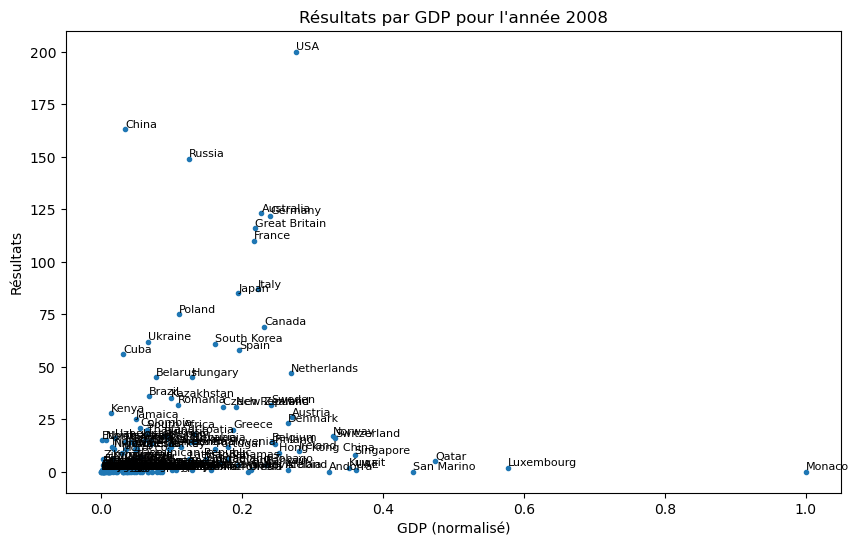

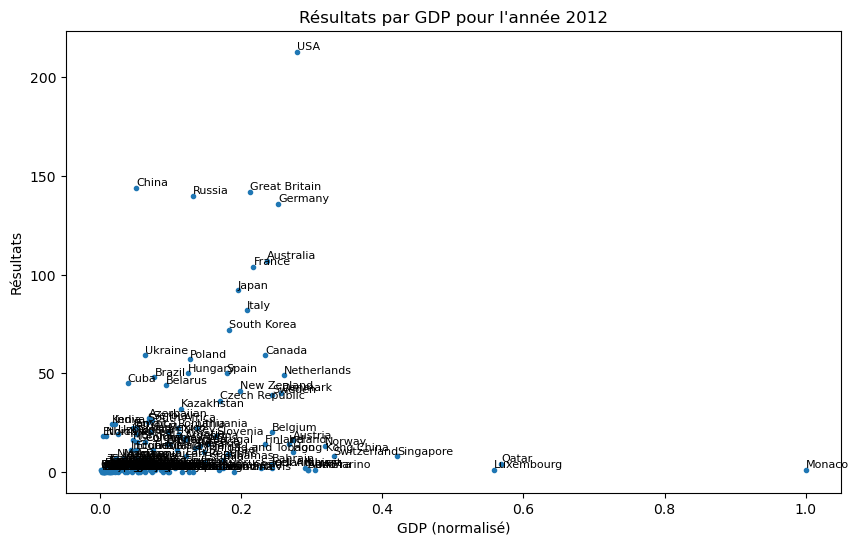

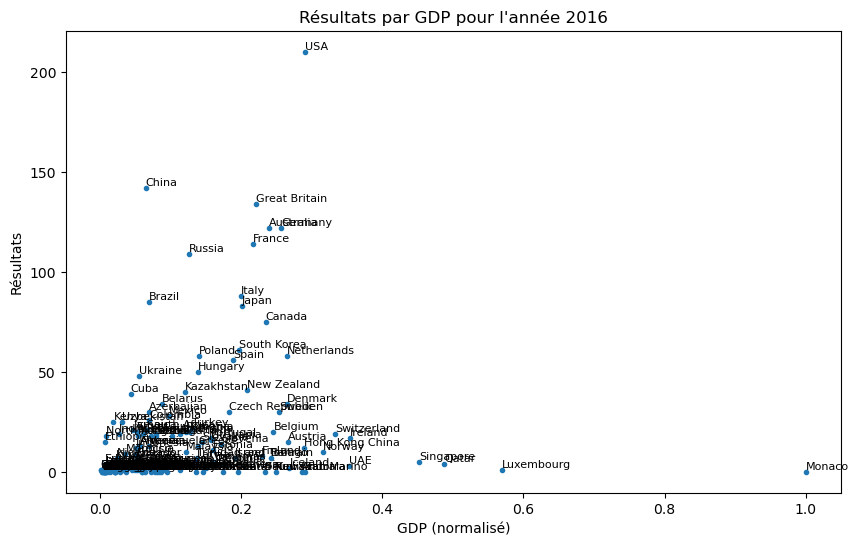

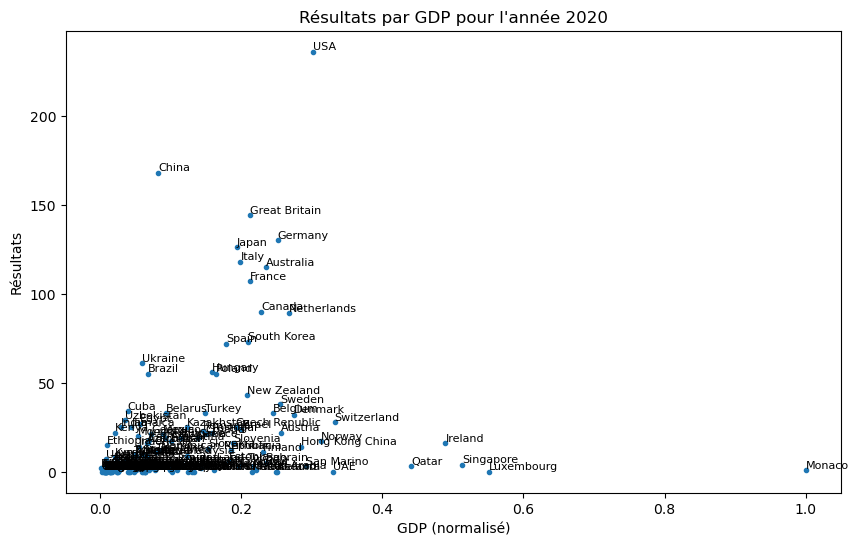

In [ ]:
# Boucle sur chaque année pour créer un graphique
for year in years:
    # Initialiser les listes pour les données de gdp et de médailles
    countries = []
    gdps = []
    medals_counts = []
    
    # Parcourir chaque pays dans les données de médailles pour l'année en cours
    for country in medals[year].index:
        if country in gdp[year].index:
            countries.append(country)
            gdps.append(gdp[year][country])
            medals_counts.append(medals[year][country])
    
    # Créer un DataFrame fusionné
    merged = pd.DataFrame({'country': countries, 'gdp': gdps, 'medals': medals_counts})
    
    # Normaliser le gdp dans l'intervalle [0, 1] pour chaque année
    merged['gdp_normalized'] = merged['gdp'] / merged['gdp'].max()
    
    # Créer la figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Tracer le graphique des résultats en fonction du gdp normalisé
    ax.plot(merged['gdp_normalized'], merged['medals'], '.', label='Points')
    
    # Ajouter les étiquettes pour chaque pays
    for i, country in enumerate(merged['country']):
        ax.text(merged['gdp_normalized'].iloc[i], merged['medals'].iloc[i], country, fontsize=8, ha='left', va='bottom')
    
    # Configuration des axes et titre
    ax.set_xlabel("PIB (normalisé)")
    ax.set_ylabel("Résultats")
    ax.set_title(f"Résultats par GDP pour l'année {year}")
    
    # Afficher le graphique
    plt.show()


In [163]:
# Seuils de gdp
threshold1 = 0.15
threshold2 = 0.325

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    countries = []
    gdps = []
    results = []

    for country in medals[year].index:
        if country in gdp[year].index:
            countries.append(country)
            gdps.append(gdp[year][country])
            results.append(medals[year][country])

    year_data = pd.DataFrame({
        'country': countries,
        'gdp': gdps,
        'results': results,
        'year': [year] * len(countries)
    })
    data.append(year_data)

df = pd.concat(data)

df1 = df[df['gdp'] <= threshold1].copy()
df2 = df[(df['gdp'] > threshold1) & (df['gdp'] <= threshold2)].copy()
df3 = df[df['gdp']  > threshold2].copy()

df1['results_normalized'] = df1['results'] / df1['results'].max()
df2['results_normalized'] = df2['results'] / df2['results'].max()
df3['results_normalized'] = df3['results'] / df3['results'].max()

palette = px.colors.qualitative.Plotly
unique_countries = df['country'].unique()
color_map = {country: palette[i % len(palette)] for i, country in enumerate(unique_countries)}
color_map['_Results = 0'] = 'gray'

def color_medals(row, threshold=0):
    if row['country'] == 'Russia':
        return row['country']
    return row['country'] if row['results'] > threshold else "_Results = 0"

df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

def create_figure(df, title):
    fig = go.Figure()

    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        fig.add_trace(go.Scatter(
            x=country_data['gdp'],
            y=country_data['results_normalized'],
            mode='markers',
            marker={'size': 10, 'color': color_map.get(country, 'gray')},
            name=country,
            text=country_data['year']
        ))

    fig.update_layout(
        xaxis_title="PIB (normalisé)",
        yaxis_title="Résultats (normalisés)",
        title=title,
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }]
    )

    return fig

# Créer les graphiques pour chaque groupe de gdp
fig1 = create_figure(df1, "Pays pauvres")
fig2 = create_figure(df2, "Pays moyennement riches")
fig3 = create_figure(df3, "Pays riches")

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("./data_visualization/gdp/pays_pauvres_statique.html")
fig2.write_html("./data_visualization/gdp/pays_moyens_statique.html")
fig3.write_html("./data_visualization/gdp/pays_riches_statique.html")

print("Les graphiques des traces ont été exportés en fichiers HTML.")

Les graphiques des traces ont été exportés en fichiers HTML.


In [164]:
# Seuils de gdp
threshold1 = 0.15
threshold2 = 0.325

# Créer une liste pour stocker les données de toutes les années
data = []

for year in years:
    countries = []
    gdps = []
    results = []

    for country in medals[year].index:
        if country in gdp[year].index:
            countries.append(country)
            gdps.append(gdp[year][country])
            results.append(medals[year][country])

    year_data = pd.DataFrame({
        'country': countries,
        'gdp': gdps,
        'results': results,
        'year': [year] * len(countries)
    })
    data.append(year_data)

df = pd.concat(data)

df1 = df[df['gdp'] <= threshold1].copy()
df2 = df[(df['gdp'] > threshold1) & (df['gdp'] <= threshold2)].copy()
df3 = df[df['gdp'] > threshold2].copy()

df1['results_normalized'] = df1['results'] / df1['results'].max()
df2['results_normalized'] = df2['results'] / df2['results'].max()
df3['results_normalized'] = df3['results'] / df3['results'].max()

palette = px.colors.qualitative.Plotly
unique_countries = df['country'].unique()
color_map = {country: palette[i % len(palette)] for i, country in enumerate(unique_countries)}
color_map['_Results = 0'] = 'gray'

def color_medals(row, threshold=0):
    if row['country'] == 'Russia':
        return row['country']
    return row['country'] if row['results'] > threshold else "_Results = 0"

df1['color'] = df1.apply(color_medals, axis=1)
df2['color'] = df2.apply(color_medals, axis=1)
df3['color'] = df3.apply(color_medals, axis=1)

def create_figure(df, title):
    fig = go.Figure()

    # Ajouter les traces pour les pays avec résultats
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        color = color_map.get(country, 'gray')  # Couleur en fonction du dictionnaire

        # Ajouter la trace normale si le pays a des résultats
        if country != '_Results = 0':
            fig.add_trace(go.Scatter(
                x=country_data[country_data['year'] == years[0]]['gdp'],
                y=country_data[country_data['year'] == years[0]]['results_normalized'],
                mode='markers',
                marker={'size': 10, 'color': color},
                name=country,
                text=country_data['year']
            ))

    # Ajouter une trace pour '_Results = 0'
    zero_result_data = df[df['color'] == '_Results = 0']
    if not zero_result_data.empty:
        fig.add_trace(go.Scatter(
            x=zero_result_data[zero_result_data['year'] == years[0]]['gdp'],
            y=zero_result_data[zero_result_data['year'] == years[0]]['results_normalized'],
            mode='markers',
            marker={'size': 10, 'color': 'gray'},
            name='_Results = 0',
            text=zero_result_data['year']
        ))

    # Créer les frames pour chaque année
    frames = []
    for year in years:
        frame_data = []

        # Ajout de la frame pour chaque pays
        for country in df['country'].unique():
            country_data = df[df['country'] == country]
            color = color_map.get(country, 'gray')

            if country != '_Results = 0':
                frame_data.append(go.Scatter(
                    x=country_data[country_data['year'] == year]['gdp'],
                    y=country_data[country_data['year'] == year]['results_normalized'],
                    mode='markers',
                    marker={'size': 10, 'color': color},
                    name=country,
                    text=country_data['year']
                ))

        # Ajout de la frame pour '_Results = 0'
        zero_result_data_year = zero_result_data[zero_result_data['year'] == year]
        if not zero_result_data_year.empty:
            frame_data.append(go.Scatter(
                x=zero_result_data_year['gdp'],
                y=zero_result_data_year['results_normalized'],
                mode='markers',
                marker={'size': 10, 'color': 'gray'},
                name='_Results = 0',
                text=zero_result_data_year['year']
            ))

        frames.append(go.Frame(data=frame_data, name=str(year)))

    fig.update(frames=frames)
    
    # Layout et légende
    fig.update_layout(
        xaxis_title="PIB (normalisé)",
        yaxis_title="Résultats (normalisés)",
        title=title,
        xaxis={'range': [-0.05, 1.05]},  
        yaxis={'range': [-0.05, 1.05]},
        annotations=[{
            "text": "",  
            "xref": "paper", "yref": "paper",
            "x": 0.5, "y": 1.15, "showarrow": False,
            "font": {"size": 20}
        }],
        updatemenus=[{
            "type": "buttons",
            "direction": "left",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "buttons": [
                {
                    "label": "Play",
                    "method": "animate",
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}]
                },
                {
                    "label": "Pause",
                    "method": "animate",
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}]
                }
            ]
        }]
    )

    fig.update_layout(
        sliders=[{
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 20},
                "prefix": "Année: ",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {"args": [[str(year)], {"frame": {"duration": 300, "redraw": True}, "mode": "immediate"}],
                 "label": str(year),
                 "method": "animate"} for year in years
            ]
        }]
    )

    return fig


# Créer les graphiques pour chaque groupe de gdp avec des échelles d'axes spécifiques
fig1 = create_figure(df1, "Pays pauvres")
fig1.update_layout(xaxis_range=[0, threshold1])  # Limite x pour les petits pays

fig2 = create_figure(df2, "Pays moyennement riches")
fig2.update_layout(xaxis_range=[threshold1, threshold2])  # Limite x pour les pays moyens

fig3 = create_figure(df3, "Pays riches")
min_gdp_log = np.log10(df3['gdp'].min()) - 0.05
max_gdp_log = np.log10(df3['gdp'].max()) + 0.05
fig3.update_layout(xaxis_type='log', xaxis_range=[min_gdp_log, max_gdp_log], xaxis_autorange=False)  # Désactive l'autorange

# Exporter les graphiques interactifs en fichiers HTML
fig1.write_html("./data_visualization/gdp/pays_pauvres_dynamique.html")
fig2.write_html("./data_visualization/gdp/pays_moyens_dynamique.html")
fig3.write_html("./data_visualization/gdp/pays_riches_dynamique.html")

print("Les graphiques interactifs ont été exportés en fichiers HTML.")

Les graphiques interactifs ont été exportés en fichiers HTML.
